In [ ]:
import pandas as pd
import numpy as np
import warnings
import math
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data=pd.read_csv('/content/drive/MyDrive/FCTP/covtype.csv')

Mounted at /content/drive


In [ ]:
dist = []

for i in range(len(data)):
  dist.insert(i, round(math.sqrt(data.loc[i, 'Horizontal_Distance_To_Hydrology']**2 + data.loc[i, 'Vertical_Distance_To_Hydrology']**2)))

data.insert(loc = 3, column = 'Distance_To_Hydrology', value = dist)
data.drop(['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology'], axis=1, inplace=True)

In [ ]:
shade = []

for i in range(len(data)):
  shade.insert(i, round((data.loc[i, 'Hillshade_9am'] + data.loc[i, 'Hillshade_Noon'] + data.loc[i, 'Hillshade_3pm']) / 3))

data.insert(loc = 5, column = 'Hillshade', value = shade)
data.drop(['Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm'], axis=1, inplace=True)

In [ ]:
area = []

for i in range(len(data)):
  for j in range(1, 5):
    if(data.loc[i, f'Wilderness_Area{j}'] == 1):
      area.insert(i, j)
      continue

data.insert(loc = 7, column = 'Wilderness', value = area)
data.drop(['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4'], axis=1, inplace=True)

In [ ]:
soil = []

for i in range(len(data)):
  for j in range(1, 41):
    if(data.loc[i, f'Soil_Type{j}'] == 1):
      soil.insert(i, j)
      continue

data.insert(loc = 8, column = 'Soil_Type', value = soil)
for j in range(1, 41):
  data.drop(f'Soil_Type{j}', axis=1, inplace=True)

In [ ]:
data

,Elevation,Aspect,Slope,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade,Horizontal_Distance_To_Fire_Points,Wilderness,Soil_Type,Cover_Type
0,2596,51,3,258,510,200,6279,1,29,5
1,2590,56,2,212,390,202,6225,1,29,5
2,2804,139,9,276,3180,202,6121,1,12,2
3,2785,155,18,269,3090,199,6211,1,30,2
4,2595,45,2,153,391,201,6172,1,29,5
...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,87,108,198,837,3,2,3
581008,2391,152,19,68,95,199,845,3,2,3
581009,2386,159,17,60,90,202,854,3,2,3
581010,2384,170,15,60,90,206,864,3,2,3


In [ ]:
class_dist=data.groupby('Cover_Type').size()
class_label=pd.DataFrame(class_dist,columns=['Count'])
plt.figure(figsize=(8,6))
sns.barplot(x=class_label.index,y='Count',data=class_label)

In [ ]:
cont_data=data.loc[:, :'Horizontal_Distance_To_Fire_Points']

binary_data=data.loc[:,'Wilderness':'Soil_Type']


In [ ]:
Cover_Types=data['Cover_Type'].astype('category') 

for i, col in enumerate(cont_data.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=Cover_Types, y=col, data=data, palette="coolwarm")

In [ ]:
for i, col in enumerate(binary_data.columns):
    plt.figure(i,figsize=(12,3))
    sns.countplot(x=col, hue=data['Cover_Type'] ,data=data, palette="rainbow")

In [ ]:
for i, col in enumerate(data.loc[:, :"Horizontal_Distance_To_Fire_Points"]):
  plt.figure(i)
  plt.title(col)
  sns.boxplot(data[col])

In [ ]:
n = (data.loc[len(data)/2, 1] + (data.loc[len(data)/2, 1]+1))/2
n

q1=data.loc[(n+1)/4, 1]
q3=data.loc[3(n+1)/4, 1]

iqr=q3-q1
iqr

In [ ]:
X=data.loc[:,'Elevation':'Soil_Type']
y=data['Cover_Type']

In [ ]:
X, X30, y, y30 = train_test_split(X,y, test_size=0.3, random_state=101)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [ ]:
neighbors = np.arange(1,8)
accuracies = []

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    
    knn.fit(X_train, y_train)

    pred = knn.predict(X_test)
    accuracies.append(accuracy_score(pred , y_test))    

accuracies

[0.9558981420012621,
 0.9480629113291207,
 0.955357216034357,
 0.9488579085835116,
 0.9510707875390327,
 0.945579569390147,
 0.9453910648865285]

Text(0, 0.5, 'Accuracy')

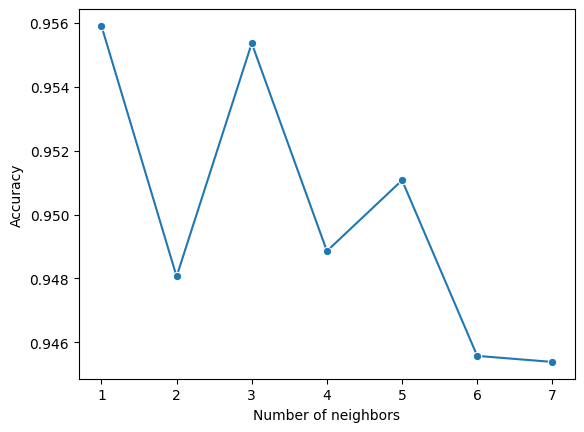

In [ ]:
sns.lineplot(x=neighbors, y=accuracies, marker="o")
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [ ]:
k_values = [i for i in range(1, 7)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

scores

[0.926010798470489,
 0.9137145084946111,
 0.9219882592317866,
 0.9152192735599334,
 0.9166281468713446,
 0.9122540017036371]

Text(0, 0.5, 'Accuracy Score')

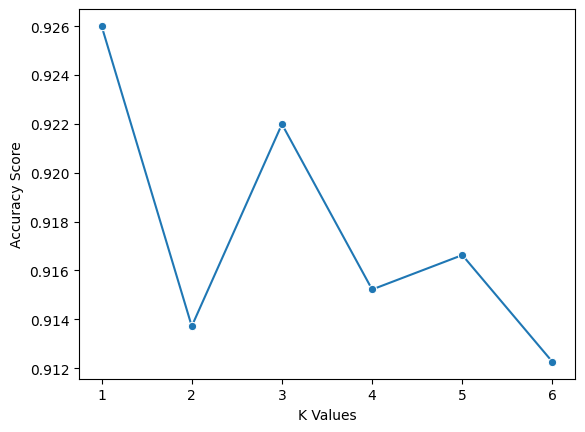

In [ ]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

y_pred=knn.predict(X30)

Accuracy = accuracy_score(y30, y_pred)

print("Accuracy:", Accuracy, '\n')
print("Confusion Matrix:\n", confusion_matrix(y30, y_pred))
print("Classification Report: \n", classification_report(y30, y_pred))

Accuracy: 0.9553882871305306 

Confusion Matrix:
 [[60548  2559     4     0    40     8   240]
 [ 2498 81824   188     2   301   145    35]
 [    1   153 10344    85    29   210     0]
 [    0     1   110   664     0    54     0]
 [   46   324    24     0  2466    10     0]
 [    6   150   241    37     6  4809     0]
 [  238    31     0     0     0     0  5873]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.96      0.96      0.96     63399
           2       0.96      0.96      0.96     84993
           3       0.95      0.96      0.95     10822
           4       0.84      0.80      0.82       829
           5       0.87      0.86      0.86      2870
           6       0.92      0.92      0.92      5249
           7       0.96      0.96      0.96      6142

    accuracy                           0.96    174304
   macro avg       0.92      0.92      0.92    174304
weighted avg       0.96      0.96      0.96    174304



In [ ]:
X30.insert(9,"Cover_Type",y30)
X30.insert(10, "Predicted_Cover_Type", y_pred)

In [ ]:
X30

,Elevation,Aspect,Slope,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade,Horizontal_Distance_To_Fire_Points,Wilderness,Soil_Type,Cover_Type,Predicted_Cover_Type
312529,3110,128,19,85,3608,189,2402,1,29,1,1
347634,2632,119,2,180,1008,203,730,3,17,5,5
75200,3050,67,10,335,5624,190,4938,1,29,1,1
116600,2810,119,23,68,4369,180,450,1,22,1,1
416318,3222,189,16,349,3451,210,800,3,32,1,1
...,...,...,...,...,...,...,...,...,...,...,...
171267,3115,273,20,190,4636,206,3190,1,22,1,1
102393,2883,149,12,174,3463,202,1731,1,12,2,2
384899,3097,170,22,994,3211,202,1978,3,33,2,2
124012,2757,175,5,68,1718,207,2184,1,12,2,2


In [ ]:
wrong_pred=pd.DataFrame(X30[X30['Cover_Type']!=X30['Predicted_Cover_Type']])

wrong_pred.reset_index(inplace=True, drop=True)
wrong_pred

,Elevation,Aspect,Slope,Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade,Horizontal_Distance_To_Fire_Points,Wilderness,Soil_Type,Cover_Type,Predicted_Cover_Type
0,3306,153,20,666,573,197,4424,2,25,2,1
1,2980,2,6,184,1359,198,589,3,23,2,1
2,2841,181,19,60,1101,207,2331,3,33,5,2
3,2388,231,9,0,603,212,1087,3,14,6,3
4,2888,54,8,540,1789,192,2932,3,23,1,2
...,...,...,...,...,...,...,...,...,...,...,...
7771,2778,40,15,123,1935,181,2226,1,12,1,2
7772,3068,225,10,30,2184,212,201,3,31,2,1
7773,3153,21,8,202,1595,194,994,2,24,1,2
7774,3092,286,4,426,2497,206,2108,3,32,2,1


<Axes: xlabel='Cover_Type'>

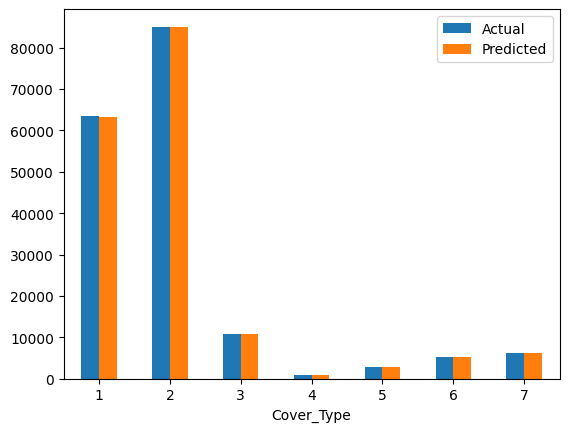

In [ ]:
ct = pd.DataFrame({"Cover_Type": [1, 2, 3, 4, 5, 6, 7], "Actual": X30.groupby('Cover_Type').size(), "Predicted": X30.groupby('Predicted_Cover_Type').size()})
ct.plot.bar(x='Cover_Type', y=["Actual", "Predicted"], rot=0)

In [ ]:
ct

,Cover_Type,Actual,Predicted
1,1,63399,63337
2,2,84993,85042
3,3,10822,10911
4,4,829,788
5,5,2870,2842
6,6,5249,5236
7,7,6142,6148


In [ ]:
pickle.dump(knn, open('drive/MyDrive/FCTP/model.pkl', 'wb'))
model=pickle.load(open('drive/MyDrive/FCTP/model.pkl', 'rb'))

In [ ]:
model.predict([[2386, 159, 17, 60, 90, 202, 854, 3, 2]])

======================================================================================================================================================================================================================================

In [ ]:
plt.figure(figsize=(10,6))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

In [ ]:
print('Data Dimension:')
print('Number of Records:', data.shape[0])
print('Number of Features:', data.shape[1])

In [ ]:
print('Feature Names')
print(data.columns)

In [ ]:
print(data.info())

In [ ]:
data.isnull().sum()

In [ ]:
data.describe()

In [ ]:
print('Skewness of the below features:')
print(data.skew())

In [ ]:
skew=data.skew()
skew_df=pd.DataFrame(skew,index=None,columns=['Skewness'])
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index,y='Skewness',data=skew_df)
plt.xticks(rotation=90)

In [ ]:
class_dist=data.groupby('Cover_Type').size()
class_label=pd.DataFrame(class_dist,columns=['Size'])
plt.figure(figsize=(8,6))
sns.barplot(x=class_label.index,y='Size',data=class_label)

In [ ]:
for i,number in enumerate(class_dist):
    percent=(number/class_dist.sum())*100
    print('Cover_Type',class_dist.index[i])
    print('%.2f'% percent,'%')

In [ ]:
cont_data=data.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']

binary_data=data.loc[:,'Wilderness_Area1':'Soil_Type40']

Wilderness_data=data.loc[:,'Wilderness_Area1': 'Wilderness_Area4']

Soil_data=data.loc[:,'Soil_Type1':'Soil_Type40']

In [ ]:
for col in binary_data:
    count=binary_data[col].value_counts()
    print(col,count)

In [ ]:
print('Soil Type',' Occurence_count')
for col in binary_data:
    count=binary_data[col].value_counts()[1] 
    if count < 1000:
        print(col,count)

In [ ]:
for i, col in enumerate(cont_data.columns):
    plt.figure(i)
    sns.distplot(cont_data[col])

In [ ]:
data['Cover_Type']=data['Cover_Type'].astype('category') 

for i, col in enumerate(cont_data.columns):
    plt.figure(i,figsize=(8,4))
    sns.boxplot(x=data['Cover_Type'], y=col, data=data, palette="coolwarm")

In [ ]:
for i, col in enumerate(binary_data.columns):
    plt.figure(i,figsize=(6,4))
    sns.countplot(x=col, hue=data['Cover_Type'] ,data=data, palette="rainbow")

In [ ]:
def rev_code(row):
    for c in Soil_data.columns:
        if row[c]==1:
            return c  

data['Soil_Type']=Soil_data.apply(rev_code, axis=1) 

In [ ]:
def rev_code(row):
    for c in Wilderness_data.columns:
        if row[c]==1:
            return c  

data['Wilderness_Type']=Wilderness_data.apply(rev_code, axis=1) 

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(x='Wilderness_Type', hue='Cover_Type',data=data, palette="rainbow")
plt.xticks(rotation=90)

In [ ]:
plt.figure(figsize=(16,8))
sns.countplot(x='Soil_Type', hue='Cover_Type',data=data, palette="rainbow")
plt.xticks(rotation=90)

In [ ]:
soil_counts = []
for num in range(1,41):
    col = ('Soil_Type' + str(num))
    this_soil = data[col].groupby(data['Cover_Type'])
    totals = []
    for value in this_soil.sum():
        totals.append(value)
    total_sum = sum(totals)
    soil_counts.append(total_sum)
    print("Total Trees in Soil Type {0}: {1}".format(num, total_sum))
    percentages = [ (total*100 / total_sum) for total in totals]
    print("{0}\n".format(percentages))
print("Number of trees in each soil type:\n{0}".format(soil_counts))

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(cont_data.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

In [ ]:
g = sns.PairGrid(cont_data)
g.map(plt.scatter)

In [ ]:
rem=['Hillshade_3pm','Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']

In [ ]:
X.drop(rem, axis=1, inplace=True)

In [ ]:
data.head()

In [ ]:
max(data.loc[:,'Soil_Type1':'Soil_Type40'].sum(axis=1))

In [ ]:
knn = KNeighborsClassifier(n_neighbors=4)

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
Accuracy=knn.score(X_test,y_test)
print('KNN Accuracy:',Accuracy)

In [ ]:
MLA = []
Z = [LinearSVC() , DecisionTreeClassifier() , LogisticRegression() , GaussianNB() ,RandomForestClassifier() , 
     GradientBoostingClassifier()]
M = ["LinearSVC" , "DecisionTreeClassifier" , "LogisticRegression" , "GaussianNB" ,"RandomForestClassifier" , 
     "GradientBoostingClassifier"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    MLA.append(accuracy_score(pred , y_test))

In [ ]:
d = { "Algorithm" : M, "Accuracy" : MLA }

dfm = pd.DataFrame(d)
dfm

,Algorithm,Accuracy
0,LinearSVC,0.385516
1,DecisionTreeClassifier,0.926401
2,LogisticRegression,0.603132
3,GaussianNB,0.620090
4,RandomForestClassifier,0.957800
5,GradientBoostingClassifier,0.772705
